In [1]:
%reload_ext sql
%config SqlMagic.autocommit = False
%config SqlMagic.autolimit = 0
%config SqlMagic.autopandas = True
%config SqlMagic.displaylimit = 200

In [2]:
%sql trino://localhost:9090/cuebiq/

'Connected: @cuebiq/'

In [3]:
import os
import time
import logging
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from datetime import datetime, timedelta

In [5]:
# SQL engine
from trino.dbapi import connect 
from sqlalchemy import create_engine
import pandas as pd
import time

class TrinoEngine():
    def __init__(self):
        conn = connect(
            host="localhost",
            port=9090,
            catalog="cuebiq"
        )
        self.cur = conn.cursor()
        self.engine = create_engine("trino://localhost:9090/cuebiq/")
    
    def execute_statement(self, query:str) -> list:
        """
        Create and drop statements.
        """
        self.cur.execute(query)
        return self.cur.fetchall()
    
    def read_sql(self, query:str) -> pd.DataFrame: 
        """
        Select and insert into operations.
        """
        return pd.read_sql(query, self.engine)

sql_engine = TrinoEngine()

In [6]:
schema_name = {'cda': 'cuebiq.paas_cda_pe_v3'}
pe_tj_table = f"{schema_name['cda']}.trajectory_uplevelled"

In [7]:
# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# H3 7

In [9]:
# country_code = 'CO'
country_code = 'IN'

pe_tj_df7 = sql_engine.read_sql(
    f"""
    SELECT 
        start_h3_7, 
        end_h3_7, 
        month_number,
        COUNT(*) AS trip_count,
        AVG(duration_minutes) AS m_duration_min,
        STDDEV(duration_minutes) AS sd_duration_min,
        approx_percentile(duration_minutes, 0.5) AS mdn_duration_min,
        AVG(length_meters) AS m_length_m,
        STDDEV(length_meters) AS sd_length_m,
        approx_percentile(length_meters, 0.5) AS mdn_length_m,
        AVG(number_of_points) AS m_points_no,
        STDDEV(number_of_points) AS sd_points_no,
        approx_percentile(number_of_points, 0.5) AS mdn_points_no
    FROM 
    (
        SELECT 
            cuebiq_id,
            TRY(date_parse(substr(start_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s')) AS event_datetime_local,
            h3_encode(start_lat, start_lng, 7) AS start_h3_7, 
            h3_encode(end_lat, end_lng, 7) AS end_h3_7, 
            duration_minutes,
            length_meters,
            number_of_points, 
            MONTH(TRY(date_parse(substr(start_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))) AS month_number
        FROM cuebiq.paas_cda_pe_v3.trajectory_uplevelled
        WHERE 
            event_date BETWEEN 20200101 AND 20200630
            AND end_country = '{country_code}' 
            AND start_country = '{country_code}'
            AND start_lat <> 0
            AND end_lat <> 0
    ) subquery
    GROUP BY start_h3_7, end_h3_7, month_number
    """
)

pe_tj_df7.to_csv(f'/home/jovyan/Data/Month/od_{country_code.lower()}_2020_month1_h37.csv', index=False)

In [10]:
pe_tj_df7 = sql_engine.read_sql(
    f"""
    SELECT 
        start_h3_7, 
        end_h3_7, 
        month_number,
        COUNT(*) AS trip_count,
        AVG(duration_minutes) AS m_duration_min,
        STDDEV(duration_minutes) AS sd_duration_min,
        approx_percentile(duration_minutes, 0.5) AS mdn_duration_min,
        AVG(length_meters) AS m_length_m,
        STDDEV(length_meters) AS sd_length_m,
        approx_percentile(length_meters, 0.5) AS mdn_length_m,
        AVG(number_of_points) AS m_points_no,
        STDDEV(number_of_points) AS sd_points_no,
        approx_percentile(number_of_points, 0.5) AS mdn_points_no
    FROM 
    (
        SELECT 
            cuebiq_id,
            TRY(date_parse(substr(start_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s')) AS event_datetime_local,
            h3_encode(start_lat, start_lng, 7) AS start_h3_7, 
            h3_encode(end_lat, end_lng, 7) AS end_h3_7, 
            duration_minutes,
            length_meters,
            number_of_points, 
            MONTH(TRY(date_parse(substr(start_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))) AS month_number
        FROM cuebiq.paas_cda_pe_v3.trajectory_uplevelled
        WHERE 
            event_date BETWEEN 20200701 AND 20201231
            AND end_country = '{country_code}' 
            AND start_country = '{country_code}'
            AND start_lat <> 0
            AND end_lat <> 0
    ) subquery
    GROUP BY start_h3_7, end_h3_7, month_number
    """
)

pe_tj_df7.to_csv(f'/home/jovyan/Data/Month/od_{country_code.lower()}_2020_month2_h37.csv', index=False)

In [ ]:
country_code = 'MX'
# country_code = 'ID'

pe_tj_df7 = sql_engine.read_sql(
    f"""
    SELECT 
        start_h3_7, 
        end_h3_7, 
        month_number,
        COUNT(*) AS trip_count,
        AVG(duration_minutes) AS m_duration_min,
        STDDEV(duration_minutes) AS sd_duration_min,
        approx_percentile(duration_minutes, 0.5) AS mdn_duration_min,
        AVG(length_meters) AS m_length_m,
        STDDEV(length_meters) AS sd_length_m,
        approx_percentile(length_meters, 0.5) AS mdn_length_m,
        AVG(number_of_points) AS m_points_no,
        STDDEV(number_of_points) AS sd_points_no,
        approx_percentile(number_of_points, 0.5) AS mdn_points_no
    FROM 
    (
        SELECT 
            cuebiq_id,
            TRY(date_parse(substr(start_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s')) AS event_datetime_local,
            h3_encode(start_lat, start_lng, 7) AS start_h3_7, 
            h3_encode(end_lat, end_lng, 7) AS end_h3_7, 
            duration_minutes,
            length_meters,
            number_of_points, 
            MONTH(TRY(date_parse(substr(start_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))) AS month_number
        FROM cuebiq.paas_cda_pe_v3.trajectory_uplevelled
        WHERE 
            event_date BETWEEN 20200101 AND 20200630
            AND end_country = '{country_code}' 
            AND start_country = '{country_code}'
            AND start_lat <> 0
            AND end_lat <> 0
    ) subquery
    GROUP BY start_h3_7, end_h3_7, month_number
    """
)

pe_tj_df7.to_csv(f'/home/jovyan/Data/Month/od_{country_code.lower()}_2020_month1_h37.csv', index=False)

In [20]:
country_code = 'MX'

pe_tj_df7 = sql_engine.read_sql(
    f"""
    SELECT 
        start_h3_7, 
        end_h3_7, 
        month_number,
        COUNT(*) AS trip_count,
        AVG(duration_minutes) AS m_duration_min,
        STDDEV(duration_minutes) AS sd_duration_min,
        approx_percentile(duration_minutes, 0.5) AS mdn_duration_min,
        AVG(length_meters) AS m_length_m,
        STDDEV(length_meters) AS sd_length_m,
        approx_percentile(length_meters, 0.5) AS mdn_length_m,
        AVG(number_of_points) AS m_points_no,
        STDDEV(number_of_points) AS sd_points_no,
        approx_percentile(number_of_points, 0.5) AS mdn_points_no
    FROM 
    (
        SELECT 
            cuebiq_id,
            TRY(date_parse(substr(start_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s')) AS event_datetime_local,
            h3_encode(start_lat, start_lng, 7) AS start_h3_7, 
            h3_encode(end_lat, end_lng, 7) AS end_h3_7, 
            duration_minutes,
            length_meters,
            number_of_points, 
            MONTH(TRY(date_parse(substr(start_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))) AS month_number
        FROM cuebiq.paas_cda_pe_v3.trajectory_uplevelled
        WHERE 
            event_date BETWEEN 20200701 AND 20201231
            AND end_country = '{country_code}' 
            AND start_country = '{country_code}'
            AND start_lat <> 0
            AND end_lat <> 0
    ) subquery
    GROUP BY start_h3_7, end_h3_7, month_number
    """
)

pe_tj_df7.to_csv(f'/home/jovyan/Data/Month/od_{country_code.lower()}_2020_month2_h37.csv', index=False)

In [22]:
country_code = 'MX'

pe_tj_df7 = sql_engine.read_sql(
    f"""
    SELECT 
        start_h3_7, 
        end_h3_7, 
        month_number,
        COUNT(*) AS trip_count,
        AVG(duration_minutes) AS m_duration_min,
        STDDEV(duration_minutes) AS sd_duration_min,
        approx_percentile(duration_minutes, 0.5) AS mdn_duration_min,
        AVG(length_meters) AS m_length_m,
        STDDEV(length_meters) AS sd_length_m,
        approx_percentile(length_meters, 0.5) AS mdn_length_m,
        AVG(number_of_points) AS m_points_no,
        STDDEV(number_of_points) AS sd_points_no,
        approx_percentile(number_of_points, 0.5) AS mdn_points_no
    FROM 
    (
        SELECT 
            cuebiq_id,
            TRY(date_parse(substr(start_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s')) AS event_datetime_local,
            h3_encode(start_lat, start_lng, 7) AS start_h3_7, 
            h3_encode(end_lat, end_lng, 7) AS end_h3_7, 
            duration_minutes,
            length_meters,
            number_of_points, 
            MONTH(TRY(date_parse(substr(start_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))) AS month_number
        FROM cuebiq.paas_cda_pe_v3.trajectory_uplevelled
        WHERE 
            event_date BETWEEN 20190701 AND 20191231
            AND end_country = '{country_code}' 
            AND start_country = '{country_code}'
            AND start_lat <> 0
            AND end_lat <> 0
    ) subquery
    GROUP BY start_h3_7, end_h3_7, month_number
    """
)

pe_tj_df7.to_csv(f'/home/jovyan/Data/Month/od_{country_code.lower()}_2019_month2_h37.csv', index=False)

# GH5

In [15]:
def export_weekly_data(country_code):
    """
    Export montly aggregated data for a specific country and save it as a CSV file.

    Parameters:
    - country_code (str): The country code (e.g., 'IN', 'CO', 'MX', etc.)
    """

    # SQL query to read the data
    pe_tj_df7 = sql_engine.read_sql(
        f"""
        SELECT 
            start_geohash5, 
            end_geohash5, 
            month_number,
            COUNT(*) AS trip_count,
            AVG(duration_minutes) AS m_duration_min,
            STDDEV(duration_minutes) AS sd_duration_min,
            approx_percentile(duration_minutes, 0.5) AS mdn_duration_min,
            AVG(length_meters) AS m_length_m,
            STDDEV(length_meters) AS sd_length_m,
            approx_percentile(length_meters, 0.5) AS mdn_length_m,
            AVG(number_of_points) AS m_points_no,
            STDDEV(number_of_points) AS sd_points_no,
            approx_percentile(number_of_points, 0.5) AS mdn_points_no
        FROM 
        (
            SELECT 
                cuebiq_id,
                TRY(date_parse(substr(start_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s')) AS event_datetime_local,
                geohash_encode(start_lat, start_lng, 5) AS start_geohash5, 
                geohash_encode(end_lat, end_lng, 5) AS end_geohash5, 
                duration_minutes,
                length_meters,
                number_of_points, 
                MONTH(TRY(date_parse(substr(start_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))) AS month_number
            FROM cuebiq.paas_cda_pe_v3.trajectory_uplevelled
            WHERE 
                event_date BETWEEN 20200101 AND 20201231
                AND end_country = '{country_code}' 
                AND start_country = '{country_code}'
                AND start_lat <> 0
                AND end_lat <> 0
        ) subquery
        GROUP BY start_geohash5, end_geohash5, month_number
        """
    )

    # Define the file path using the country code
    file_path = f'/home/jovyan/Data/Month/od_{country_code.lower()}_2020_month_gh5.csv'

    # Save the data to a CSV file
    pe_tj_df7.to_csv(file_path, index=False)
    print(f"Data for {country_code} saved to {file_path}")


In [ ]:
# Example usage:
export_weekly_data('CO') 

In [ ]:
export_weekly_data('ID') 

In [ ]:
export_weekly_data('IN') 

In [ ]:
export_weekly_data('MX') 

# Check

## H37

In [59]:
country_code = 'CO' 
# country_code = 'ID' 
# country_code = 'IN' 
# country_code = 'MX' 

In [60]:
# file1 = f'/home/jovyan/Data/Month/od_{country_code.lower()}_2019_month1_h37.csv'
file1 = f'/home/jovyan/Data/Month/od_{country_code.lower()}_2020_month1_h37.csv'
df1 = pd.read_csv(file1)
df1

,start_h3_7,end_h3_7,month_number,trip_count,m_duration_min,sd_duration_min,mdn_duration_min,m_length_m,sd_length_m,mdn_length_m,m_points_no,sd_points_no,mdn_points_no
0,8766e42d4ffffff,8766e42d4ffffff,1,4877,45.064435,81.546712,18.584920,1690.245696,25855.339795,316.951944,6.041624,13.331488,4
1,8766f1c5cffffff,8766f1c5dffffff,1,89,63.230524,107.274176,31.937500,3970.121161,4116.407109,3932.272885,5.943820,4.082556,5
2,8766e092effffff,8766e428bffffff,1,60,91.306389,103.567758,54.650000,11556.527606,8043.170628,9267.535335,12.300000,8.735860,10
3,8766e0906ffffff,8766e0904ffffff,1,285,56.792515,94.315348,23.528571,4333.099879,19893.851122,1655.792939,6.905263,8.870834,5
4,8766e42abffffff,8766e42d6ffffff,1,214,126.245171,172.239028,55.565667,9808.038505,4911.498588,8581.769663,12.490654,13.542054,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
340521,87660ba94ffffff,87660bb84ffffff,6,1,56.283333,NaN,56.283333,20439.177611,NaN,20439.177611,8.000000,NaN,8
340522,876619c81ffffff,87661836bffffff,6,1,290.650000,NaN,290.650000,27586.920187,NaN,27586.920187,25.000000,NaN,25
340523,876618368ffffff,876619d6effffff,6,1,994.766667,NaN,994.766667,61162.482683,NaN,61162.482683,15.000000,NaN,15
340524,8766c4633ffffff,8766c0c4bffffff,6,1,211.933333,NaN,211.933333,76661.978256,NaN,76661.978256,7.000000,NaN,7


In [61]:
sorted(df1['month_number'].unique())

[1, 2, 3, 4, 5, 6]

In [62]:
# file2 = f'/home/jovyan/Data/Month/od_{country_code.lower()}_2019_month2_h37.csv'
file2 = f'/home/jovyan/Data/Month/od_{country_code.lower()}_2020_month2_h37.csv'
df2 = pd.read_csv(file2)
df2

,start_h3_7,end_h3_7,month_number,trip_count,m_duration_min,sd_duration_min,mdn_duration_min,m_length_m,sd_length_m,mdn_length_m,m_points_no,sd_points_no,mdn_points_no
0,8766c4804ffffff,8766c4800ffffff,7,14,54.396429,123.784331,12.566667,3013.058125,4973.504698,1329.473139,4.428571,3.837353,4
1,876622090ffffff,8766220b3ffffff,7,5,65.630000,46.423137,75.316667,5707.235524,2477.136334,4943.000512,6.200000,2.863564,6
2,8766e4623ffffff,8766e4623ffffff,7,303,73.775413,142.876451,26.047863,3465.322704,13973.777006,680.323693,4.732673,4.092210,3
3,8766f1c56ffffff,8766f1ce9ffffff,7,3,118.877778,117.484718,63.650000,10641.294156,1213.479954,10610.253300,6.333333,4.509250,6
4,8766e0915ffffff,8766e0932ffffff,7,9,73.057407,63.804871,68.750000,4877.537126,2955.695121,3953.509078,5.444444,2.403701,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246034,87660b283ffffff,87660b2b3ffffff,12,1,60.800000,NaN,60.800000,6465.575472,NaN,6465.575472,3.000000,NaN,3
246035,8766e6511ffffff,8766e6513ffffff,12,1,216.650000,NaN,216.650000,4142.107666,NaN,4142.107666,2.000000,NaN,2
246036,8766e64d4ffffff,8766f5b54ffffff,12,1,52.700000,NaN,52.700000,27154.209925,NaN,27154.209925,124.000000,NaN,124
246037,876618361ffffff,87661826effffff,12,1,44.083333,NaN,44.083333,25886.155569,NaN,25886.155569,12.000000,NaN,12


In [63]:
sorted(df2['month_number'].unique())

[7, 8, 9, 10, 11, 12]

In [64]:
# df2 = df2[df2['month_number'] != 1]
# df2

In [65]:
# combined_df = df1 # for co 2019
combined_df = pd.concat([df1, df2], ignore_index=True)
combined_df

,start_h3_7,end_h3_7,month_number,trip_count,m_duration_min,sd_duration_min,mdn_duration_min,m_length_m,sd_length_m,mdn_length_m,m_points_no,sd_points_no,mdn_points_no
0,8766e42d4ffffff,8766e42d4ffffff,1,4877,45.064435,81.546712,18.584920,1690.245696,25855.339795,316.951944,6.041624,13.331488,4
1,8766f1c5cffffff,8766f1c5dffffff,1,89,63.230524,107.274176,31.937500,3970.121161,4116.407109,3932.272885,5.943820,4.082556,5
2,8766e092effffff,8766e428bffffff,1,60,91.306389,103.567758,54.650000,11556.527606,8043.170628,9267.535335,12.300000,8.735860,10
3,8766e0906ffffff,8766e0904ffffff,1,285,56.792515,94.315348,23.528571,4333.099879,19893.851122,1655.792939,6.905263,8.870834,5
4,8766e42abffffff,8766e42d6ffffff,1,214,126.245171,172.239028,55.565667,9808.038505,4911.498588,8581.769663,12.490654,13.542054,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
586560,87660b283ffffff,87660b2b3ffffff,12,1,60.800000,NaN,60.800000,6465.575472,NaN,6465.575472,3.000000,NaN,3
586561,8766e6511ffffff,8766e6513ffffff,12,1,216.650000,NaN,216.650000,4142.107666,NaN,4142.107666,2.000000,NaN,2
586562,8766e64d4ffffff,8766f5b54ffffff,12,1,52.700000,NaN,52.700000,27154.209925,NaN,27154.209925,124.000000,NaN,124
586563,876618361ffffff,87661826effffff,12,1,44.083333,NaN,44.083333,25886.155569,NaN,25886.155569,12.000000,NaN,12


In [66]:
combined_df = combined_df.drop_duplicates()
combined_df

,start_h3_7,end_h3_7,month_number,trip_count,m_duration_min,sd_duration_min,mdn_duration_min,m_length_m,sd_length_m,mdn_length_m,m_points_no,sd_points_no,mdn_points_no
0,8766e42d4ffffff,8766e42d4ffffff,1,4877,45.064435,81.546712,18.584920,1690.245696,25855.339795,316.951944,6.041624,13.331488,4
1,8766f1c5cffffff,8766f1c5dffffff,1,89,63.230524,107.274176,31.937500,3970.121161,4116.407109,3932.272885,5.943820,4.082556,5
2,8766e092effffff,8766e428bffffff,1,60,91.306389,103.567758,54.650000,11556.527606,8043.170628,9267.535335,12.300000,8.735860,10
3,8766e0906ffffff,8766e0904ffffff,1,285,56.792515,94.315348,23.528571,4333.099879,19893.851122,1655.792939,6.905263,8.870834,5
4,8766e42abffffff,8766e42d6ffffff,1,214,126.245171,172.239028,55.565667,9808.038505,4911.498588,8581.769663,12.490654,13.542054,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
586560,87660b283ffffff,87660b2b3ffffff,12,1,60.800000,NaN,60.800000,6465.575472,NaN,6465.575472,3.000000,NaN,3
586561,8766e6511ffffff,8766e6513ffffff,12,1,216.650000,NaN,216.650000,4142.107666,NaN,4142.107666,2.000000,NaN,2
586562,8766e64d4ffffff,8766f5b54ffffff,12,1,52.700000,NaN,52.700000,27154.209925,NaN,27154.209925,124.000000,NaN,124
586563,876618361ffffff,87661826effffff,12,1,44.083333,NaN,44.083333,25886.155569,NaN,25886.155569,12.000000,NaN,12


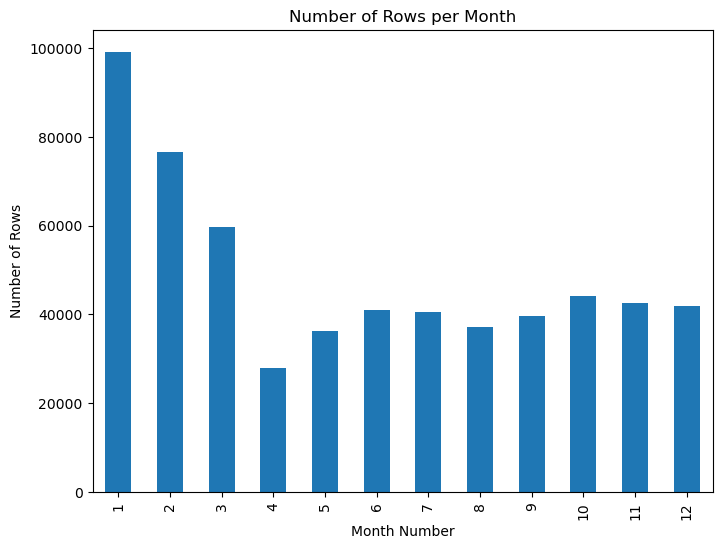

In [67]:
# Plot (1): Number of rows per month
rows_per_month = combined_df.groupby('month_number').size()
plt.figure(figsize=(8, 6))
rows_per_month.plot(kind='bar')
plt.title('Number of Rows per Month')
plt.xlabel('Month Number')
plt.ylabel('Number of Rows')
plt.show()

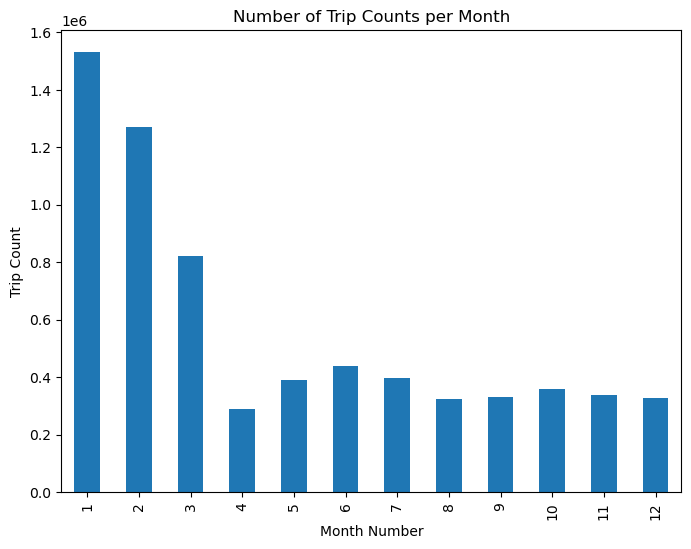

In [68]:
# Plot (2): Number of trip_count per month
trip_count_per_month = combined_df.groupby('month_number')['trip_count'].sum()
plt.figure(figsize=(8, 6))
trip_count_per_month.plot(kind='bar')
plt.title('Number of Trip Counts per Month')
plt.xlabel('Month Number')
plt.ylabel('Trip Count')
plt.show()

In [69]:
combined_df.to_csv(f"/home/jovyan/Data/Month/combined/od_month_h37_{country_code.lower()}_2020_all.csv", index=False)
# combined_df.to_csv(f"/home/jovyan/Data/Month/combined/od_month_h37_{country_code.lower()}_2019_all.csv", index=False)

In [70]:
filtered = combined_df[combined_df['trip_count'] > 9]
filtered

,start_h3_7,end_h3_7,month_number,trip_count,m_duration_min,sd_duration_min,mdn_duration_min,m_length_m,sd_length_m,mdn_length_m,m_points_no,sd_points_no,mdn_points_no
0,8766e42d4ffffff,8766e42d4ffffff,1,4877,45.064435,81.546712,18.584920,1690.245696,25855.339795,316.951944,6.041624,13.331488,4
1,8766f1c5cffffff,8766f1c5dffffff,1,89,63.230524,107.274176,31.937500,3970.121161,4116.407109,3932.272885,5.943820,4.082556,5
2,8766e092effffff,8766e428bffffff,1,60,91.306389,103.567758,54.650000,11556.527606,8043.170628,9267.535335,12.300000,8.735860,10
3,8766e0906ffffff,8766e0904ffffff,1,285,56.792515,94.315348,23.528571,4333.099879,19893.851122,1655.792939,6.905263,8.870834,5
4,8766e42abffffff,8766e42d6ffffff,1,214,126.245171,172.239028,55.565667,9808.038505,4911.498588,8581.769663,12.490654,13.542054,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
585599,876620ad4ffffff,876620ad0ffffff,12,13,22.034615,13.474007,22.533333,330.696966,194.104271,218.658694,2.615385,0.960769,2
585677,8766182e4ffffff,876618219ffffff,12,12,25.625000,26.647789,23.633333,167.888559,82.092232,165.064413,3.000000,1.477098,3
585832,8766d110dffffff,8766d110dffffff,12,17,36.951961,62.922922,23.916667,396.654488,243.691236,349.075085,3.470588,1.419403,3
585849,876608993ffffff,876608993ffffff,12,25,100.298000,87.145111,87.500000,1889.080734,4031.657305,352.027056,5.040000,2.388863,5


In [71]:
filtered.to_csv(f"/home/jovyan/Data/Month/cleaned/od_month_h37_{country_code.lower()}_2020.csv", index=False)
# filtered.to_csv(f"/home/jovyan/Data/Month/cleaned/od_month_h37_{country_code.lower()}_2019.csv", index=False)

## GH5

In [29]:
country_code = 'CO' 
# country_code = 'ID' 
# country_code = 'IN' 
# country_code = 'MX' 

In [30]:
# file = f'/home/jovyan/Data/Month/od_{country_code.lower()}_2019_month.csv'
file = f'/home/jovyan/Data/Month/od_{country_code.lower()}_2020_month_gh5.csv'
df = pd.read_csv(file)
df.rename(columns={'month': 'month_number'}, inplace=True)
df

,start_geohash5,end_geohash5,month_number,trip_count,m_duration_min,sd_duration_min,mdn_duration_min,m_length_m,sd_length_m,mdn_length_m,m_points_no,sd_points_no,mdn_points_no
0,d3fy4,d3fy4,1,3234,76.939435,141.921761,27.443703,2695.669249,7171.737095,613.161961,5.888992,7.207352,4
1,d3fy6,d3fy6,1,4433,52.135063,94.777550,21.778141,1743.645941,5080.374614,457.301390,5.013760,4.541728,4
2,d344w,d344r,1,11,257.665152,262.222985,124.250000,33182.094818,41884.053250,5383.994494,13.363636,10.002727,13
3,d34k1,d3473,1,10,259.340000,217.995422,204.516667,16770.555007,8279.604308,14553.817328,6.900000,5.087021,8
4,d2fb6,d2fb6,1,1467,62.604431,107.987226,28.430352,4561.201344,28211.551172,420.161136,5.385140,5.018614,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297945,d372p,d3s2h,12,1,334.350000,NaN,334.350000,211271.475758,NaN,211271.475758,2.000000,NaN,2
297946,d3h6u,d3h60,10,1,532.616667,NaN,532.616667,53726.961239,NaN,53726.961239,21.000000,NaN,21
297947,d299c,d29ed,12,1,240.200000,NaN,240.200000,32908.254347,NaN,32908.254347,7.000000,NaN,7
297948,d2g3c,d2ftx,12,1,296.300000,NaN,296.300000,132449.192125,NaN,132449.192125,13.000000,NaN,13


In [31]:
sorted(df['month_number'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [32]:
df = df.drop_duplicates()
df

,start_geohash5,end_geohash5,month_number,trip_count,m_duration_min,sd_duration_min,mdn_duration_min,m_length_m,sd_length_m,mdn_length_m,m_points_no,sd_points_no,mdn_points_no
0,d3fy4,d3fy4,1,3234,76.939435,141.921761,27.443703,2695.669249,7171.737095,613.161961,5.888992,7.207352,4
1,d3fy6,d3fy6,1,4433,52.135063,94.777550,21.778141,1743.645941,5080.374614,457.301390,5.013760,4.541728,4
2,d344w,d344r,1,11,257.665152,262.222985,124.250000,33182.094818,41884.053250,5383.994494,13.363636,10.002727,13
3,d34k1,d3473,1,10,259.340000,217.995422,204.516667,16770.555007,8279.604308,14553.817328,6.900000,5.087021,8
4,d2fb6,d2fb6,1,1467,62.604431,107.987226,28.430352,4561.201344,28211.551172,420.161136,5.385140,5.018614,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297945,d372p,d3s2h,12,1,334.350000,NaN,334.350000,211271.475758,NaN,211271.475758,2.000000,NaN,2
297946,d3h6u,d3h60,10,1,532.616667,NaN,532.616667,53726.961239,NaN,53726.961239,21.000000,NaN,21
297947,d299c,d29ed,12,1,240.200000,NaN,240.200000,32908.254347,NaN,32908.254347,7.000000,NaN,7
297948,d2g3c,d2ftx,12,1,296.300000,NaN,296.300000,132449.192125,NaN,132449.192125,13.000000,NaN,13


In [33]:
df.to_csv(f"/home/jovyan/Data/Month/combined/od_month_gh5_{country_code.lower()}_2020_all.csv", index=False)
# df.to_csv(f"/home/jovyan/Data/Month/combined/od_month_gh5_{country_code.lower()}_2019_all.csv", index=False)

In [34]:
filtered = df[df['trip_count'] > 9]
filtered

,start_geohash5,end_geohash5,month_number,trip_count,m_duration_min,sd_duration_min,mdn_duration_min,m_length_m,sd_length_m,mdn_length_m,m_points_no,sd_points_no,mdn_points_no
0,d3fy4,d3fy4,1,3234,76.939435,141.921761,27.443703,2695.669249,7171.737095,613.161961,5.888992,7.207352,4
1,d3fy6,d3fy6,1,4433,52.135063,94.777550,21.778141,1743.645941,5080.374614,457.301390,5.013760,4.541728,4
2,d344w,d344r,1,11,257.665152,262.222985,124.250000,33182.094818,41884.053250,5383.994494,13.363636,10.002727,13
3,d34k1,d3473,1,10,259.340000,217.995422,204.516667,16770.555007,8279.604308,14553.817328,6.900000,5.087021,8
4,d2fb6,d2fb6,1,1467,62.604431,107.987226,28.430352,4561.201344,28211.551172,420.161136,5.385140,5.018614,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296917,d36mv,d36mv,12,27,37.598148,55.852612,24.533333,1021.465640,732.222998,859.206378,3.629630,1.667521,3
296957,d37wj,d37wj,12,12,124.351389,190.367829,73.000000,604.212733,692.313040,298.536785,3.583333,1.164500,4
297082,d2fhg,d2fhg,12,47,85.011702,132.839979,36.116667,3937.217973,11697.223517,615.032686,3.957447,2.349444,3
297323,d2cgv,d2cgv,12,14,86.085714,110.738504,30.400000,1192.322229,1124.778400,1318.238796,4.000000,2.320477,3


In [35]:
filtered.to_csv(f"/home/jovyan/Data/Month/cleaned/od_month_gh5_{country_code.lower()}_2020.csv", index=False)
# filtered.to_csv(f"/home/jovyan/Data/Month/cleaned/od_month_gh5_{country_code.lower()}_2019.csv", index=False)